In [1]:
# import DiCE
import dice_ml
from dice_ml.utils import helpers  # helper functions

# imports for decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt

# imports for model parser
from tree_parser import parse_tree
import torch

In [2]:
dataset = helpers.load_adult_income_dataset()

d = dice_ml.Data(dataframe=dataset, continuous_features=['age', 'hours_per_week'], outcome_name='income')

train, test = d.split_data(d.normalize_data(d.one_hot_encoded_data))
X_train = train.loc[:, train.columns != 'income']
y_train = train.loc[:, train.columns == 'income']

x_test = test.loc[:, test.columns != 'income']
y_test = test.loc[:, test.columns == 'income']


In [20]:
# now train the sklearns decision tree
clf = DecisionTreeClassifier(max_leaf_nodes=5, random_state=0)
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(x_test, y_test))

0.8243243243243243
0.8185168125287886


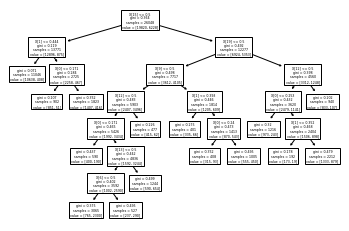

In [21]:
# Tree visualisation code
tree.plot_tree(clf)
plt.show()

In [22]:
# now parse the model in pytorch
model = parse_tree(clf)

# convert the dataset to tensors
x_train_ = torch.Tensor(X_train.to_numpy())

In [23]:
# demonstrate the forward prop with that diff tree
# also print the loss
from torch.nn import BCELoss

with torch.no_grad():
    loss = BCELoss()
    output = model.forward(x_train_)
    gt = torch.Tensor(y_train.to_numpy())
    print(loss(output, gt))

# save the model to device
# torch.save(model, "model.pt")

tensor(0.7009)


In [ ]:
# now generate the counter factuals using dice
backend = 'PYT'
m = dice_ml.Model(model=model, backend=backend)

exp = dice_ml.Dice(d, m)

query_instance = {'age':22, 
                  'workclass':'Private', 
                  'education':'HS-grad', 
                  'marital_status':'Single', 
                  'occupation':'Service',
                  'race': 'White', 
                  'gender':'Female', 
                  'hours_per_week': 45}

dice_exp = exp.generate_counterfactuals(query_instance, total_CFs=4, desired_class="opposite")

dice_exp.visualize_as_dataframe(show_only_changes=True)

C:\Users\rites\.conda\envs\gpu\lib\site-packages\torch\nn\modules\container.py:552: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")
